# K Nearest Neighbors Implementation

## About the data set

Our group chose to use the DnD data set provided with the model optimization lesson. We will be doing a KNN regression in order to predict `score`.

## Initializing dataframe: 

*   Import CSV & all necessary methods and classes
*   Read CSV as a dataframe and save it to a variable

In [1]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('LASSO-data-set.csv')

## Understanding & Cleaning the Data




First, when checking for null values, we see that no columns contain null values and it seems that all data was loaded in as a number, which is what we would expect.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   strength      1000 non-null   int64  
 1   dexterity     1000 non-null   int64  
 2   constitution  1000 non-null   int64  
 3   wisdom        1000 non-null   int64  
 4   intelligence  1000 non-null   int64  
 5   charisma      1000 non-null   int64  
 6   weight        1000 non-null   int64  
 7   height        1000 non-null   int64  
 8   modifier1     1000 non-null   int64  
 9   modifier2     1000 non-null   int64  
 10  modifier3     1000 non-null   int64  
 11  modifier4     1000 non-null   int64  
 12  modifier5     1000 non-null   int64  
 13  modifier6     1000 non-null   int64  
 14  modifier7     1000 non-null   int64  
 15  modifier8     1000 non-null   int64  
 16  score         1000 non-null   float64
dtypes: float64(1), int64(16)
memory usage: 132.9 KB


In [4]:
df.describe()

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8,score
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,173.710000,126.08600,72.944000,126.025000,173.298000,73.030000,173.135000,72.982000,41.726000,41.792000,41.842000,41.741000,6.516000,6.265000,6.208000,6.261000,465.252724
std,13.479748,42.97685,12.339981,44.230405,13.651724,12.425679,6.638738,11.904596,13.959075,14.058961,14.017972,13.674682,4.462921,4.418178,4.426548,3.143049,105.920902
min,140.000000,50.00000,31.000000,50.000000,137.000000,35.000000,149.000000,35.000000,13.000000,13.000000,13.000000,18.000000,-4.000000,-4.000000,-4.000000,1.000000,160.315802
25%,164.000000,90.00000,65.000000,88.000000,163.000000,65.000000,169.000000,65.000000,30.000000,30.000000,30.000000,30.000000,4.000000,3.000000,3.000000,4.000000,388.867222
50%,174.000000,125.00000,73.000000,127.000000,173.000000,72.000000,173.000000,72.000000,42.000000,42.000000,43.000000,42.000000,6.000000,6.000000,6.000000,7.000000,469.314618
75%,184.000000,163.00000,82.000000,165.000000,184.000000,82.000000,178.000000,81.000000,53.000000,53.250000,54.000000,54.000000,10.000000,9.000000,9.000000,9.000000,537.424852
max,207.000000,199.00000,114.000000,199.000000,205.000000,116.000000,190.000000,115.000000,70.000000,70.000000,70.000000,65.000000,16.000000,16.000000,16.000000,11.000000,760.947598


Distribution of each column's values:

array([[<AxesSubplot:title={'center':'strength'}>,
        <AxesSubplot:title={'center':'dexterity'}>,
        <AxesSubplot:title={'center':'constitution'}>,
        <AxesSubplot:title={'center':'wisdom'}>],
       [<AxesSubplot:title={'center':'intelligence'}>,
        <AxesSubplot:title={'center':'charisma'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'modifier1'}>,
        <AxesSubplot:title={'center':'modifier2'}>,
        <AxesSubplot:title={'center':'modifier3'}>,
        <AxesSubplot:title={'center':'modifier4'}>],
       [<AxesSubplot:title={'center':'modifier5'}>,
        <AxesSubplot:title={'center':'modifier6'}>,
        <AxesSubplot:title={'center':'modifier7'}>,
        <AxesSubplot:title={'center':'modifier8'}>],
       [<AxesSubplot:title={'center':'score'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

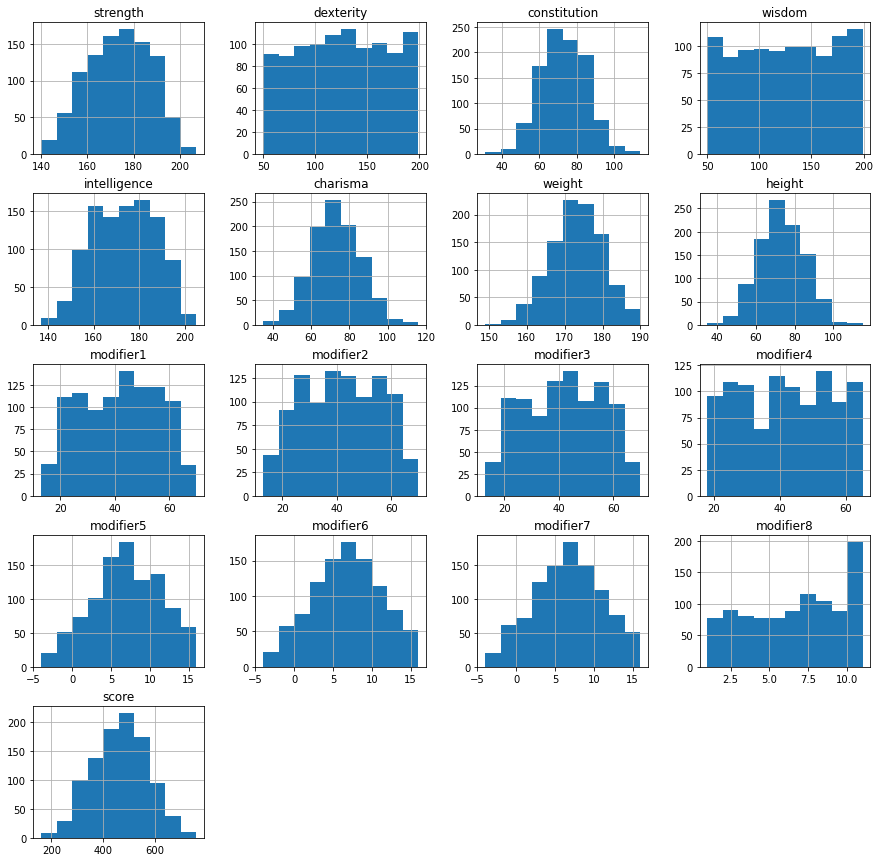

In [5]:
df.hist(figsize = [15,15])

We noticed that the `modifier8` column had some outliers. However, when looking further into the data, we noticed that all of these outliers had a value of 11. After some research, we concluded that this is a standard value for human characters in DnD and it should not be excluded.

In [6]:

df[df['modifier8'] > 10]['modifier8'].value_counts()

11    101
Name: modifier8, dtype: int64

Scaling the data

In [7]:
scaler = StandardScaler().fit(df)

In [8]:
df_scaled = pd.DataFrame(scaler.transform(df))
df_scaled.columns = df.columns
df_scaled

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8,score
0,-1.314480,1.278397,-1.535941,-1.470878,-1.047864,-1.049160,-0.472465,-1.259135,1.023072,1.295765,1.010495,1.335909,-0.115677,-0.512911,-0.499058,-0.719725,1.769316
1,-1.908260,0.254078,1.301788,0.474459,-1.047864,0.480697,-1.075290,0.925988,0.378008,0.157131,0.796376,0.531101,1.005226,0.845794,-0.273035,0.553561,-0.492193
2,-0.720700,0.417038,0.491008,0.383978,-0.681427,0.883291,0.281067,0.589815,0.664703,1.011107,0.796376,1.043252,0.108503,1.525147,1.309123,0.553561,0.430518
3,0.169969,-1.701441,0.896398,1.175685,1.810347,0.963810,1.034599,1.262161,-0.338731,-0.269856,-0.131468,-0.420037,-0.339858,-0.286460,-1.403149,-0.401404,-0.689453
4,-0.720700,-0.933201,1.058554,-1.154195,0.857610,1.607960,1.034599,1.346204,0.234660,0.370625,0.296768,0.457936,-1.684942,-0.965813,-1.629172,-1.038047,0.066177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.982483,0.230798,-0.157616,1.288786,0.344598,0.078103,-1.376703,0.001513,0.521355,0.868777,0.510886,0.823758,1.453587,1.978049,0.631055,1.190204,0.042906
996,0.466859,0.673117,-0.481927,0.813762,-0.754714,-0.485528,-0.020345,-0.922962,-1.055469,-1.408490,-0.987941,-1.371175,-0.339858,-0.965813,0.631055,0.235240,-0.594508
997,1.283307,-0.164962,-0.400849,1.514988,1.370622,-0.646566,-0.020345,-0.502746,0.019639,-0.625679,-0.416959,-0.273708,0.556865,0.845794,0.405033,-0.401404,0.144629
998,-1.017590,0.952477,-0.238693,-0.769652,-0.828002,-0.324491,0.281067,-0.082530,1.166420,1.580423,1.581476,1.555403,-1.236580,-1.645166,-1.629172,-1.674690,1.671679


# Initial regressions

*   KNN Regressions

 *  n_neighbors is set to the recommended value ($k=\sqrt n$ where $n$ is the number of samples in the dataset)

*   Linear Regressions

*   LassoCV Regressions

### KNN Regression on the scaled dataframe

Before any feature engineering and using $k=\sqrt n$, the model has an $R^2$ of $0.889$, which at first seems pretty good! However, when looking at the residuals, we can see a strong pattern, with the residuals trending upward. This suggests that our data does not meet the conditions of KNN currently. The model may be overfitting the data.


r squared: 0.8888991467802052


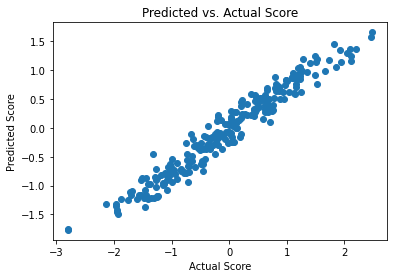

In [9]:
y = df_scaled['score']
X = df_scaled.drop(columns = 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
knn = KNeighborsRegressor(n_neighbors = round(len(df_scaled)**(1/2))).fit(X_train, y_train)
y_pred = knn.predict(X_test)
r2=knn.score(X_test, y_test)

print(f'r squared: {r2}')
plt.scatter(y_test,y_pred)

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted vs. Actual Score')
plt.show()


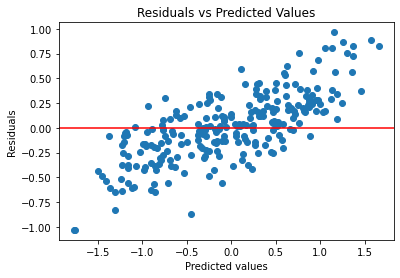

In [10]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r')
plt.show()

### KNN Regression on the non-scaled dataframe

We also ran KNN on the un-scaled data to see how it performed. $R^2$ for this model is $0.768$, so the scaled data performed better on our initial tests. The residuals for this model have a weaker pattern but still seem to trend upward. Because the un-scaled data performed worse in our initial test, we decided to stick with only using the scaled DataFrame

r squared: 0.7683567416300067


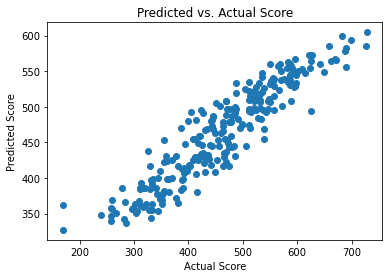

In [11]:
y = df['score']
X = df.drop(columns = 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
knn = KNeighborsRegressor(n_neighbors = round(len(df_scaled)**(1/2))).fit(X_train, y_train)
y_pred = knn.predict(X_test)
r2= knn.score(X_test, y_test)


print(f'r squared: {r2}')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted vs. Actual Score')
plt.show()

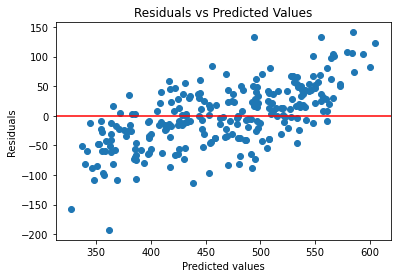

In [12]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r')
plt.show()

### Linear Regression on the scaled dataframe

To get an inital sense for how the KNN algorithm was performing compared to similar algorithms, we ran a linear regression on our scaled dataset. We found that this model has an $R^2$ of $0.999$, which is concerning and indicates potential overfitting.

r squared: 0.999916814568704


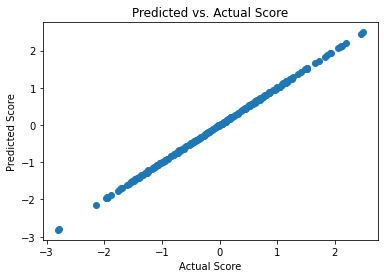

In [13]:
y = df_scaled['score']
X = df_scaled.drop(columns = 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2=reg.score(X_test, y_test)

print(f'r squared: {r2}')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted vs. Actual Score')
plt.show()

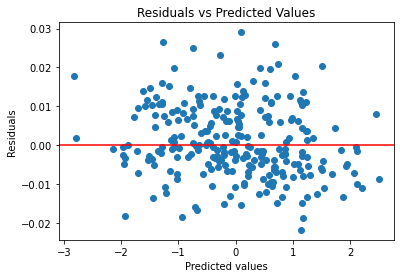

In [14]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r')
plt.show()

### LASSOCV Regression on the scaled dataframe

We also ran a LASSO regression on the scaled dataset and got similar results as with the linear regression.

r squared: 0.999920462175474


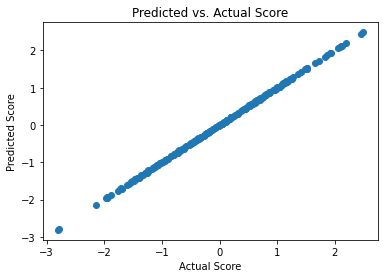

In [15]:
y = df_scaled['score']
X = df_scaled.drop(columns = 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2= lasso.score(X_test, y_test)

print(f'r squared: {r2}')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted vs. Actual Score')
plt.show()

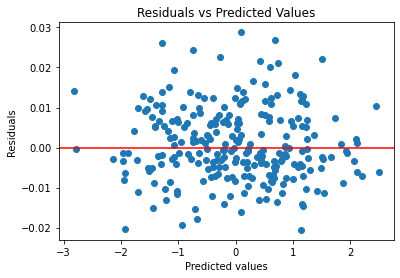

In [16]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r')
plt.show()

# Feature engineering
As seen with residual plot for the KNN model, there are potentially extraneous columns causing overfitting. After looking at the correlation matrix once again, we can see that the only columns with an absolute value of the correlation coefficient greater than $0.5$ are `constitution`,`charisma`,  `height`, `modifier1`, `modifier2`, `modifier3`, and `modifier4`. `constitution`,`charisma`,  `height` are all highly correlated with each other. The same is true with `modifier1`, `modifier2`, `modifier3`, and `modifier4`. We opted to only use `height` and `modifier4` in the final model as these two are not correlated with each other and are the most highly correlated with `score`.

<Figure size 1800x1200 with 0 Axes>

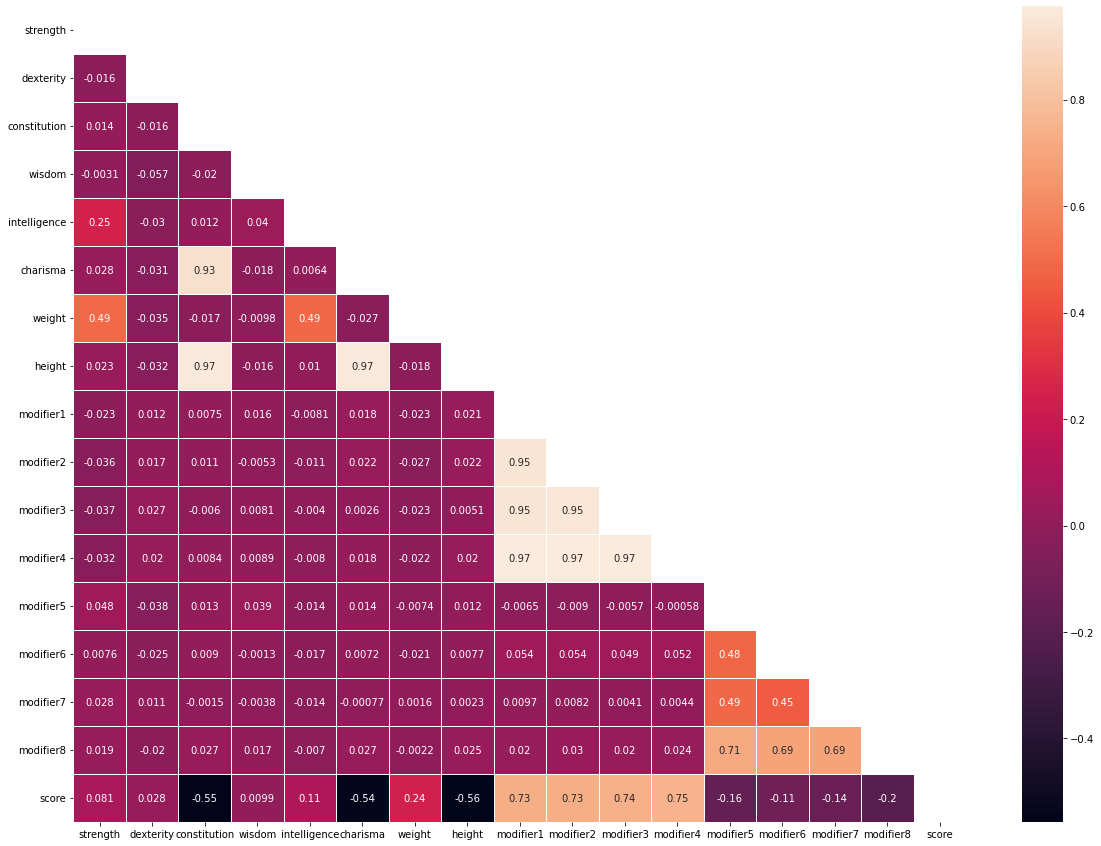

In [17]:
plt.figure(dpi=300)
f, ax = plt.subplots(figsize=(20, 15))
# Compute the correlation matrix
corr = df_scaled.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, mask=mask)
plt.show()

In [18]:
df_scaled_dropped = df_scaled.copy()

In [19]:
df_scaled_dropped = df_scaled_dropped[['height','modifier4','score']]

df_scaled_dropped.head()

,height,modifier4,score
0,-1.259135,1.335909,1.769316
1,0.925988,0.531101,-0.492193
2,0.589815,1.043252,0.430518
3,1.262161,-0.420037,-0.689453
4,1.346204,0.457936,0.066177


# Trying the models again after feature engineering



### KNN

After removing uncorrelated columns, the KNN model produces an $R^2$ 0f $0.881$. This is slightly lower that the $R^2$ of the original dataset. However, the residual plot looks much more normally distributed.

r squared: 0.8811590076069598


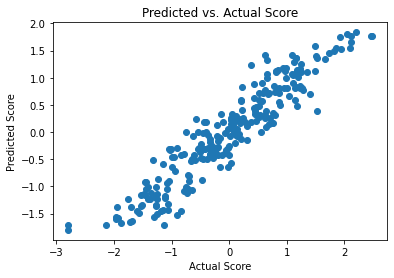

In [20]:
y = df_scaled_dropped['score']
X = df_scaled_dropped.drop(columns = 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
knn = KNeighborsRegressor(n_neighbors = round(len(df_scaled_dropped)**(1/2))).fit(X_train, y_train)
y_pred = knn.predict(X_test)
r2= knn.score(X_test, y_test)

print(f'r squared: {r2}')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted vs. Actual Score')
plt.show()

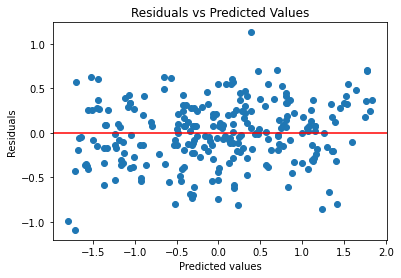

In [21]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r')
plt.show()

### Linear Regression

The $R^2$ for linear regression after feature engineering is $0.9$, which is still high, but less concerning that the $R^2$ of 0.999 we saw earlier.

r squared: 0.9011538630151463


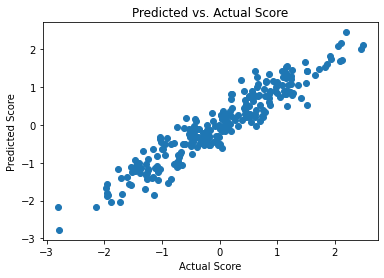

In [22]:
y = df_scaled_dropped['score']
X = df_scaled_dropped.drop(columns = 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = reg.score(X_test, y_test)

print(f'r squared: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted vs. Actual Score')
plt.show()

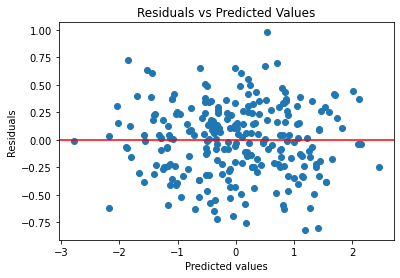

In [23]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r')
plt.show()

### LASSOCV 

The LASSO model produced similar results as the linear regression.

r squared: 0.9011798809183478


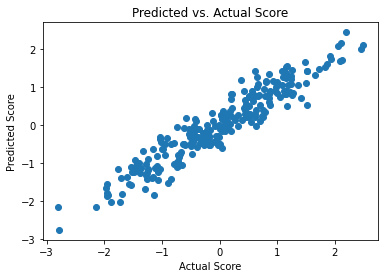

In [24]:
y = df_scaled_dropped['score']
X = df_scaled_dropped.drop(columns = 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2 = lasso.score(X_test, y_test)

print(f'r squared: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted vs. Actual Score')
plt.show()

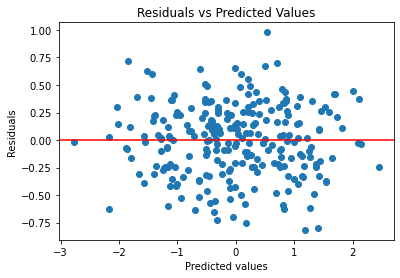

In [25]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r')
plt.show()

## Hyperparameter tuning for KNN

The recommendation is $k=\sqrt n$ where $n$ is the number of samples in the dataset, so we used that as the default. Now we're going to test other values and find the best using GridSearch CV. We also were curious about the best distance metric to use. We found that `n_neighbors = 16` and `metric = 'minkowski'` were the best values for the hyperparameters.

In [26]:
y = df_scaled_dropped['score']
X = df_scaled_dropped.drop(columns = 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
knn = KNeighborsRegressor()

k_range = list(range(1,100))
d_range = ['minkowski','manhattan','euclidean']
param_grid = dict(n_neighbors=k_range,metric=d_range)
grid = GridSearchCV(knn, param_grid,scoring='r2')

grid_search = grid.fit(X_train,y_train)
print(grid_search.best_params_)

{'metric': 'minkowski', 'n_neighbors': 16}


## Final Model

Using the tuned hyperparameters, the KNN model has an $R^2$ of $0.886$.

r squared: 0.8860281782525778


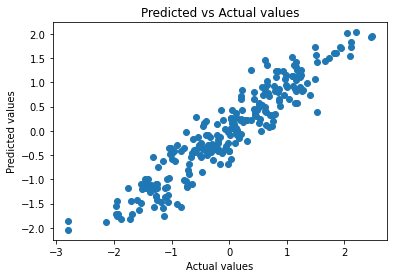

In [27]:
y = df_scaled_dropped['score']
X = df_scaled_dropped.drop(columns = 'score')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

knn = KNeighborsRegressor(n_neighbors = 16, metric = 'minkowski').fit(X_train, y_train)
y_pred = knn.predict(X_test)

r2 = knn.score(X_test,y_test)

print(f'r squared: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual values")
plt.show()

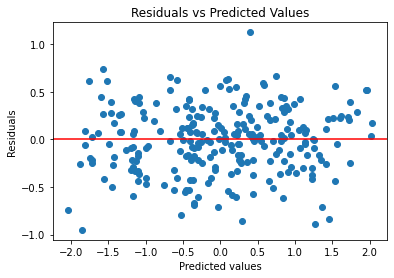

In [28]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r')
plt.show()

## How does KNN Regression compare to other regression models?

The other regression models we used seemed to perform better than the KNN method. However, that's not to say that KNN performed poorly. We ended up with an $R^2$ value of $0.886$ meaning that almost 89% of the variance in the data can be explained by our model. 

Ideas for improved performance


*   Higher correlation threshold (we used 0.5)
*   Combine highly correlated colums as opposed to just dropping them

